#Тестовое 3. Проверка стат. гипотез

Импорт необходимых библиотек

In [2]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns

##Загрузка данных

In [3]:
df = pd.read_csv('Статистика.csv', encoding='Windows-1251')
df['Пол'] = df['Пол'].replace({'М': 1,'Ж': 0})
df.head()

,Количество больничных дней,Возраст,Пол
0,5,39,0
1,4,54,1
2,4,26,1
3,5,42,1
4,4,29,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Количество больничных дней  237 non-null    int64
 1   Возраст                     237 non-null    int64
 2   Пол                         237 non-null    int64
dtypes: int64(3)
memory usage: 5.7 KB


Пропущенных значений нет

##Гипотеза 1.	Мужчины пропускают в течение года более 2 рабочих дней (work_days) по болезни значимо чаще женщин.

Определим выборки

In [5]:
male_sick_days = df[df['Пол'] == 1]['Количество больничных дней']
female_sick_days = df[df['Пол'] == 0]['Количество больничных дней']


Посмотрим на распределения

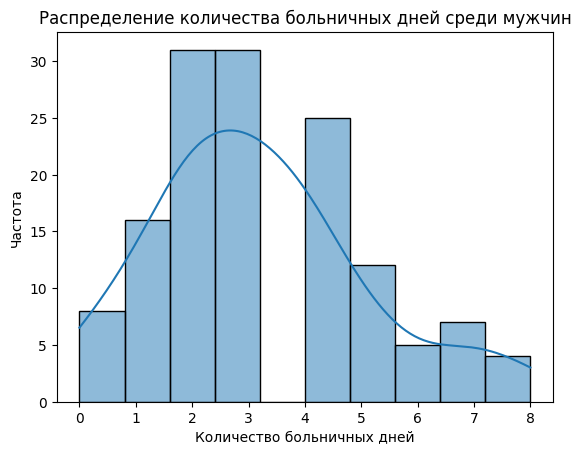

In [6]:
sns.histplot(male_sick_days, bins=10, kde=True)
plt.title('Распределение количества больничных дней среди мужчин')
plt.xlabel('Количество больничных дней')
plt.ylabel('Частота')
plt.show()

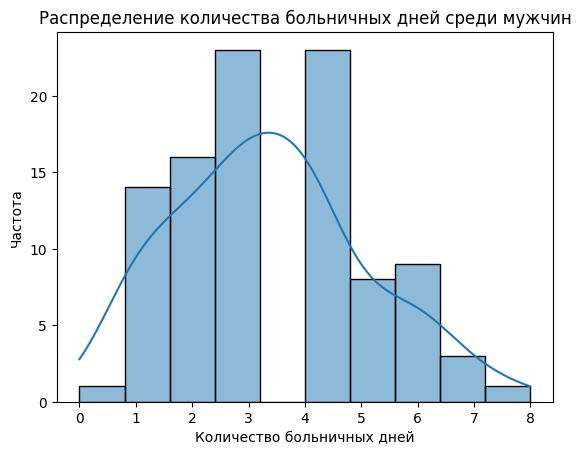

In [7]:
sns.histplot(female_sick_days, bins=10, kde=True)
plt.title('Распределение количества больничных дней среди мужчин')
plt.xlabel('Количество больничных дней')
plt.ylabel('Частота')
plt.show()

В целом данные распределены нормально с незначительной скошенностью вправо.

Посмотрим на стандартные отклонения

In [8]:
male_std = male_sick_days.std()
print(f'Стандартное отклонение больничных у мужчин {round(male_std, 2)}')
female_std = female_sick_days.std()
print(f'Стандартное отклонение больничных у женщин {round(female_std, 2)}')

Стандартное отклонение больничных у мужчин 1.89
Стандартное отклонение больничных у женщин 1.69


Разница между стандартными отклонениями не существена.

Нулевая гиптоеза H0 заключается в том, что мужчины пропускают 2 и более дней по болезни также, как и женщины.
Альтернативная гипотеза H1 - мужчины пропускают 2 дня и более чаще женщин.
Проведём t-test Стьюдента

In [9]:
mean_male = male_sick_days.mean()
mean_female = female_sick_days.mean()

In [10]:
aplha = 0.05 #уровень статистической значимости
results = st.ttest_ind(
    male_sick_days,
    female_sick_days,
    alternative = "greater"
)

print(f"Среднее количество больничных мужчин: {mean_male:.3f}")
print(f"Среднее количество больничных женщин: {mean_female:.3f}")
print("Результаты T-теста:")
print(f"p-значение: {results.pvalue}")
print(f"T-статистика: {results.statistic}")

Среднее количество больничных мужчин: 3.180
Среднее количество больничных женщин: 3.367
Результаты T-теста:
p-значение: 0.7835622639702478
T-статистика: -0.7856303350416829


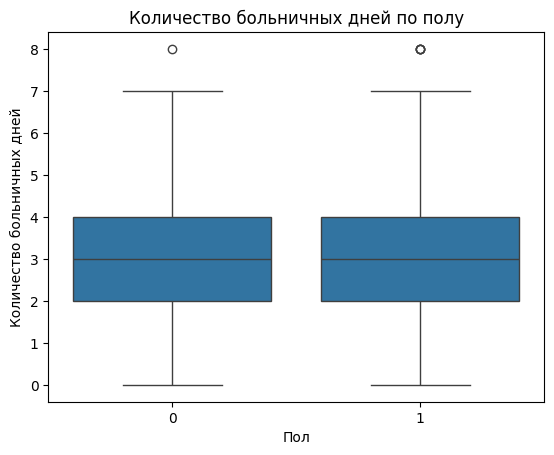

In [11]:
sns.boxplot(x='Пол', y='Количество больничных дней', data=df)
plt.title('Количество больничных дней по полу')
plt.show()

###Вывод

p-value получилось значительно выше уровня статистической значимости, что говорит о том, что у нас нет основания отвергнуть нулевую гипотезу в пользу альтернативной.
Соответственно, нет статстически значимого различия между больничными мужчин и женщин, они болеют одинаково часто.

##Гипотеза 2. Работники старше 35 лет (age) пропускают в течение года более 2 рабочих дней (work_days) по болезни значимо чаще своих более молодых коллег.

In [12]:
old_sick_days = df[df['Возраст'] > 35]['Количество больничных дней']
young_sick_days = df[df['Возраст'] <= 35]['Количество больничных дней']


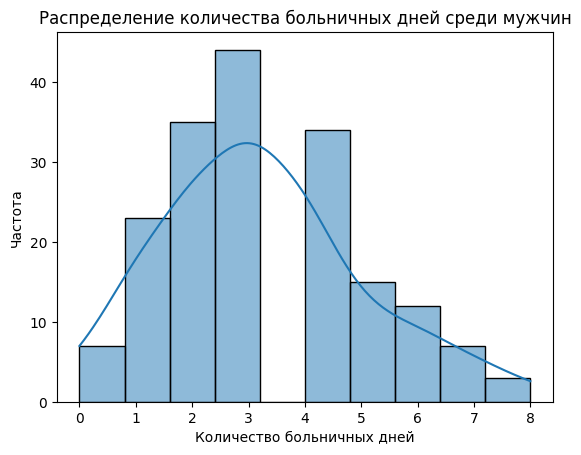

In [13]:
sns.histplot(old_sick_days, bins=10, kde=True)
plt.title('Распределение количества больничных дней среди возрастных')
plt.xlabel('Количество больничных дней')
plt.ylabel('Частота')
plt.show()

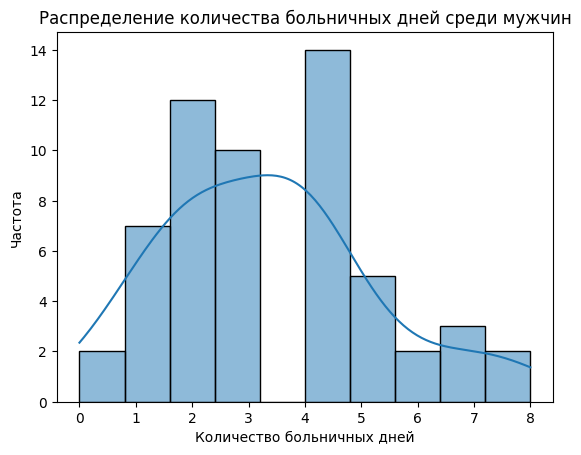

In [14]:
sns.histplot(young_sick_days, bins=10, kde=True)
plt.title('Распределение количества больничных дней среди молодых')
plt.xlabel('Количество больничных дней')
plt.ylabel('Частота')
plt.show()

Данные аналогично распределены нормально.

In [15]:
old_std = old_sick_days.std()
print(f'Стандартное отклонение больничных у старших сотрудников {round(male_std, 2)}')
young_std = young_sick_days.std()
print(f'Стандартное отклонение больничных у младших {round(female_std, 2)}')

Стандартное отклонение больничных у старших сотрудников 1.89
Стандартное отклонение больничных у младших 1.69


Разница не значительна.

Нулевая гиптоеза H0 заключается в том, что работнки старше 35 лет пропускают 2 и более дней по болезни также, как и молодые.
Альтернативная гипотеза H1 - сотрудники старше 35 пропускают 2 дня и более чаще молодых.
Проведём t-test Стьюдента

In [16]:
mean_old = old_sick_days.mean()
mean_young = young_sick_days.mean()

In [17]:
aplha = 0.05 #уровень статистической значимости
results = st.ttest_ind(
    old_sick_days,
    young_sick_days,
    alternative = "greater"
)

print(f"Среднее количество больничных мужчин: {mean_male:.3f}")
print(f"Среднее количество больничных женщин: {mean_female:.3f}")
print("Результаты T-теста:")
print(f"p-значение: {results.pvalue}")
print(f"T-статистика: {results.statistic}")

Среднее количество больничных мужчин: 3.180
Среднее количество больничных женщин: 3.367
Результаты T-теста:
p-значение: 0.6724513088930768
T-статистика: -0.447262667369775


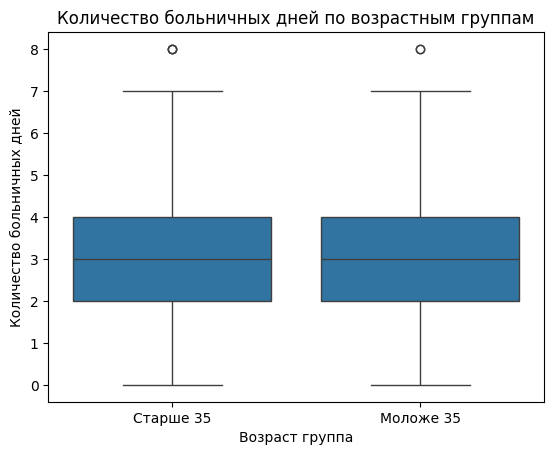

In [20]:
df['Возраст группа'] = ['Старше 35' if x > 35 else 'Моложе 35' for x in df['Возраст']]
sns.boxplot(x='Возраст группа', y='Количество больничных дней', data=df)
plt.title('Количество больничных дней по возрастным группам')
plt.show()

###Вывод

p-value получилось значительно выше уровня статистической значимости, что говорит о том, что у нас нет основания отвергнуть нулевую гипотезу в пользу альтернативной.
Соответственно, нет статстически значимого различия между больничными сотрудников старше и младше 35 лет, они болеют одинаково часто.